In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

Building a Simple Neural Network algorithm from scratch...

In [3]:
class Neural_Network:

  def __init__(self, input_size, hidden_size, output_size):

    # Input to Hidden Layer weights
    self.hidden_weights = np.random.rand(input_size, hidden_size)
    self.hidden_bias = np.zeros((1, hidden_size))

    # Hidden layer to Output weights
    self.output_weights = np.random.rand(hidden_size, output_size)
    self.output_bias = np.zeros((1, output_size))

  # Activation Function & Its derivative
  def sigmoid(self, x):
    return 1 / (1 + np.exp(-x))

  def sigmoid_derivative(self, x):
    return x * (1 - x)

  # Loss function
  def loss(self, y, y_hat):
    m = len(y)
    loss = -1/m * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
    return loss

  # Forward Propagation
  def forward_propagation(self, X):
    # Input to Hidden
    self.hidden_layer_input = np.dot(X, self.hidden_weights) + self.hidden_bias
    self.hidden_layer_output = self.sigmoid(self.hidden_layer_input)

    # Hidden to Output
    self.output_layer_input = np.dot(self.hidden_layer_output, self.output_weights) + self.output_bias
    return self.sigmoid(self.output_layer_input)

  # Backward Propagation
  def backward_propagation(self, X, y, predicted_output, learning_rate):
    # Outputlayer
    error = y - predicted_output
    d_predicted_output = error * self.sigmoid_derivative(predicted_output)

    #Hiddenlayer
    error_hidden_layer = d_predicted_output.dot(self.output_weights.T)
    d_hidden_layer = error_hidden_layer * self.sigmoid_derivative(self.hidden_layer_output)

    # Updating weights & bias @ output_layer
    self.output_weights += self.hidden_layer_output.T.dot(d_predicted_output) * learning_rate
    self.output_bias += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate

    # Updating weights & bias @ hidden_layer
    self.hidden_weights += X.T.dot(d_hidden_layer) * learning_rate
    self.hidden_bias += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

  # Calculating Accuracy
  def accuracy(self, X, y):
    predictions = self.predict(X)
    class_labels = (predictions > 0.5).astype(int)
    return np.mean(class_labels == y)

  # Training the model
  def train(self, X_train, y_train, epochs, learning_rate, print_every):
    self.train_accuracy = []
    self.train_loss = []

    # Looping through iterations
    for epoch in range(epochs):
      predicted_output_train = self.forward_propagation(X_train)
      self.backward_propagation(X_train, y_train, predicted_output_train, learning_rate)

      # Appending loss and accuracy
      self.train_accuracy.append(self.accuracy(X_train, y_train))
      self.train_loss.append(self.loss(y_train, predicted_output_train))


      if epoch % print_every == 0:
          # Evaluating on training data
          train_accuracy = self.accuracy(X_train, y_train)
          train_loss = self.loss(y_train, predicted_output_train)

        # Printing the results for each specified epoch
          print(f"Epoch {epoch+1}/{epochs}")
          print(f"Train Accuracy: {train_accuracy:.4f}, Train Loss: {train_loss:.4f}\n")

  # Making predictions
  def predict(self, X):
    return self.forward_propagation(X)
    print(self.forward_propagation)

To check we take PIMA Indian Diabetic Dataset from this source https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv', header=None)
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Class"]
df.columns = columns


#Split the dataset
X = df.drop('Class',axis=1)
y = df['Class']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify = y)

#Scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Passing dataset to the algorithm

Epoch 1/10000
Train Accuracy: 0.3538, Train Loss: 0.8514

Epoch 1001/10000
Train Accuracy: 0.7858, Train Loss: 0.4635

Epoch 2001/10000
Train Accuracy: 0.7840, Train Loss: 0.4494

Epoch 3001/10000
Train Accuracy: 0.7933, Train Loss: 0.4401

Epoch 4001/10000
Train Accuracy: 0.7952, Train Loss: 0.4334

Epoch 5001/10000
Train Accuracy: 0.7989, Train Loss: 0.4287

Epoch 6001/10000
Train Accuracy: 0.8026, Train Loss: 0.4252

Epoch 7001/10000
Train Accuracy: 0.7989, Train Loss: 0.4219

Epoch 8001/10000
Train Accuracy: 0.8101, Train Loss: 0.4188

Epoch 9001/10000
Train Accuracy: 0.8138, Train Loss: 0.4154

Training Accuracy: 80.82%

Test Accuracy: 72.73%

Final hidden weights: 
 [[ 1.1378 -1.0873  1.2262]
 [ 1.7178  0.3203  2.0468]
 [-0.9022 -0.5677  0.6148]
 [ 0.4081 -0.4609 -0.514 ]
 [ 1.1227 -0.8309 -0.9475]
 [ 0.5935  2.321  -0.2551]
 [-0.3483  1.7006  0.3998]
 [-1.0997  0.3327  2.1754]]

Final hidden bias: 
 [[-0.876  -0.6359  1.1582]]

Final output weights: 
 [[2.8413]
 [2.2364]
 [2.908

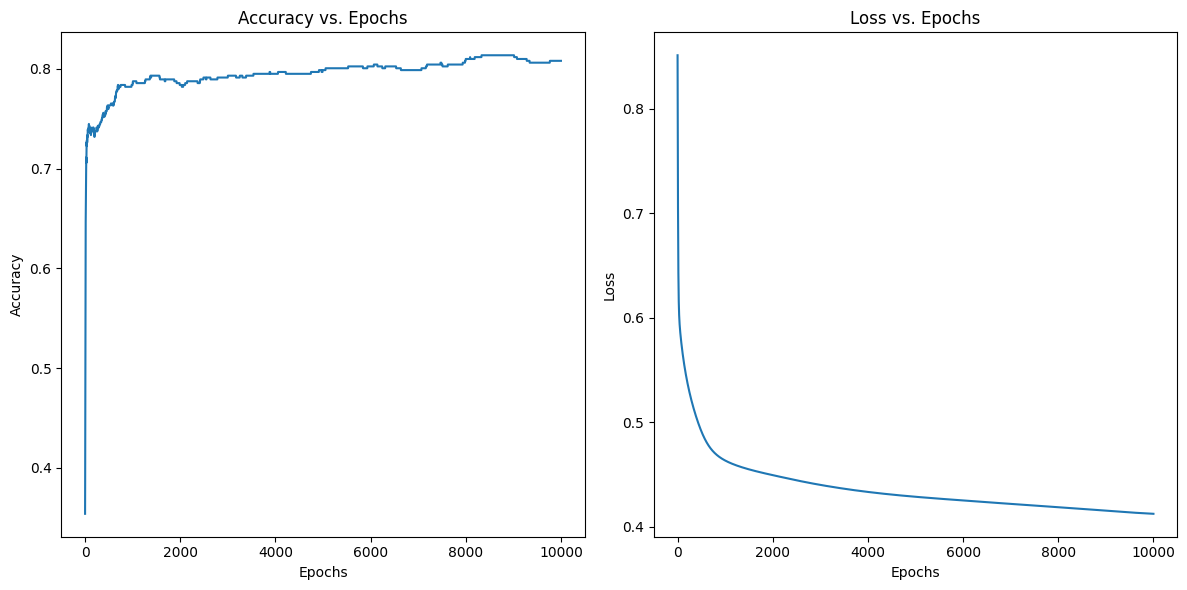

In [6]:
# Training & Fitting the model
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

nn_clf = Neural_Network(input_size = 8, hidden_size = 3, output_size = 1)
nn_clf.train(X_train_scaled, y_train, epochs=10000, learning_rate=0.001, print_every=1000)

# Calculating accuracy
train_accuracy = nn_clf.accuracy(X_train_scaled, y_train)
test_accuracy = nn_clf.accuracy(X_test_scaled, y_test)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%\n")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%\n")

# Printing weights and biases
# Ensure you're accessing the correct variable names for weights and biases
print(f"Final hidden weights: \n", nn_clf.hidden_weights.round(4))
print("\nFinal hidden bias: \n", nn_clf.hidden_bias.round(4))
print("\nFinal output weights: \n", nn_clf.output_weights.round(4))
print("\nFinal output bias: \n", nn_clf.output_bias.round(4), "\n")

# Plotting Loss and Accuracy
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 6))

# Ensure you're using the correct variable names that store the loss and accuracy history
ax1.plot(nn_clf.train_accuracy)
ax1.set_title('Accuracy vs. Epochs')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')

ax2.plot(nn_clf.train_loss)
ax2.set_title('Loss vs. Epochs')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')

plt.tight_layout()
plt.show()